[toc]

# 导入库

In [1]:
import numpy as np
import sympy as sp
from IPython.display import Math
import matplotlib.pyplot as plt

用以解决一个类似如下的问题：

$$
\begin{bmatrix}
b_1 & c_1 & 0 & \cdots & 0\\
a_2 & b_2 & c_2 & \cdots & 0\\
0 & \ddots & \ddots & \ddots & 0\\
0 & 0 & a_{n-1} & b_{n-1} & c_{n-1}\\
0 & 0& \cdots & a_n & b_n
\end{bmatrix}
\begin{bmatrix}
    x_1\\
    x_2\\
    x_3\\
    \vdots\\
    x_5
\end{bmatrix}=
\begin{bmatrix}
    d_1\\
    d_2\\
    d_3\\
    \vdots\\
    d_5
\end{bmatrix}
$$

下面给出一组测试数据并写入`ThomasTestData`：

In [2]:
N = 10
a = np.random.randint(20, size=N)
c = np.random.randint(20, size=N)
b = np.random.randint(20, size=N)
d = np.random.randint(20, size=N)
a[0] = 0.0
c[N-1] = 0.0

data = np.array(
    [a, b, c, d],
    dtype=float
)
np.savetxt("ThomasTestData.txt", data)
print("a = ", a)
print("b = ", b)
print("c = ", c)
print("d = ", d)

a =  [ 0  2  2  1  5 11  0  3  2 16]
b =  [11  0  5 14 17 10 17 19 11  6]
c =  [ 6  1 17  0  7 18  2 11 10  0]
d =  [17  6 15 16  7  2 16  1  4  4]


为方便观赏写成矩阵形式：

In [3]:
mat = sp.zeros(N, N)
for i in range(N):
    mat[i, i] = b[i]
    pass
for i in range(1, N):
    mat[i, i-1] = a[i]
    pass
for i in range(0, N-1):
    mat[i, i+1] = c[i]
    pass
d_mat = sp.Matrix([
    d
]).transpose()
x = sp.Matrix(sp.symbols("x_1:"+str(N+1)))
display(
    Math(
        sp.latex(mat)+
        sp.latex(x)+
        "="+
        sp.latex(d_mat)
    )
)

<IPython.core.display.Math object>

# `Python`解

In [4]:
sol_python = mat.solve(d_mat)
print("分数解：")
sol_python

分数解：


Matrix([
[              689/236],
[            -1189/472],
[               19/118],
[              267/236],
[  228280361/175814454],
[-1041316739/351628908],
[          15426/16021],
[          -2953/16021],
[           2350/16021],
[           4414/16021]])

In [5]:
print("python数值解：")
py_res = np.float64(np.array(sol_python.evalf()).T[0])
py_res

python数值解：


array([ 2.91949153, -2.5190678 ,  0.16101695,  1.13135593,  1.29841635,
       -2.96140822,  0.96286124, -0.18432058,  0.14668248,  0.27551339])

# `cpp` 解

代码在 `ThomasCpp.cpp` 文件中，核心程序如下：

```cpp
std::vector<double> Thomas(std::vector<double> b, std::vector<double> a, std::vector<double> c, std::vector<double> d){
    int N = b.size();
    std::vector<double> beta(N);
    std::vector<double> y(N);
    std::vector<double> l(N);
    std::vector<double> x(N);
    beta[0] = b[0];
    y[0] = d[0];
    for(int j=1; j<N; j++){
        l[j] = a[j] / beta[j-1];
        beta[j] = b[j] - l[j] * c[j-1];
        y[j] = d[j] - l[j] * y[j-1];
    }
    x[N-1] = y[N-1] / beta[N-1];
    for(int j=N-2; j>-1; j--){
        x[j] = (y[j] - c[j] * x[j+1]) / beta[j];
    }
    return x;
}
```

用 `python` 编译一下并且读取文件：

In [6]:
import os
cpp_result_file = "CppResult.txt"
os.system("g++ -o ThomasCpp ThomasCpp.cpp ")
os.system("./ThomasCpp > "+cpp_result_file)

0

In [7]:
cpp_res = np.loadtxt(cpp_result_file).T
print("cpp数值解：")
print(cpp_res)

cpp数值解：
[ 2.91949  -2.51907   0.161017  1.13136   1.29842  -2.96141   0.962861
 -0.184321  0.146682  0.275513]


# 比较

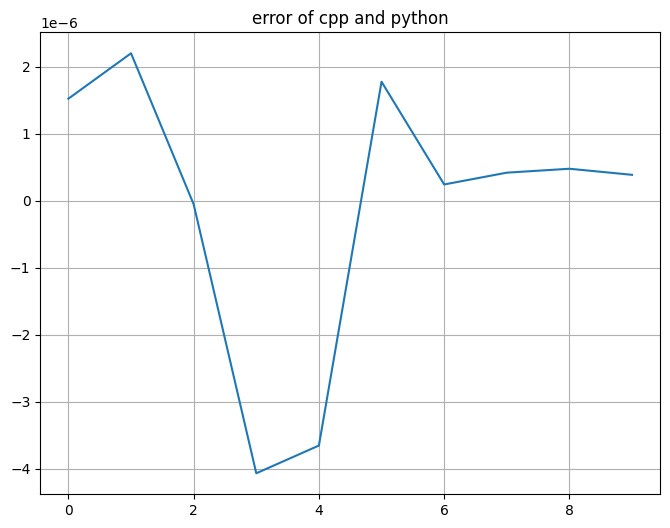

In [8]:
plt.figure(figsize=(8, 6), facecolor="white")
plt.plot(py_res-cpp_res)
plt.title("error of cpp and python")
plt.grid(True)
plt.show()